In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.graph_objs

In [2]:
df1 = pd.read_csv('data/2010-2016-school-safety-report.csv')
df2 = pd.read_csv('data/2016 School Explorer.csv')
df3= pd.read_csv('data/D5 SHSAT Registrations and Testers.csv')

In [3]:
df2_2 = df2[['School Name', 'District', 'Latitude', 'Longitude', 'City', 'Community School?', 'Economic Need Index', 'School Income Estimate', 'Percent Asian', 'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White', 'Student Attendance Rate']]
df2_2.head()

,School Name,District,Latitude,Longitude,City,Community School?,Economic Need Index,School Income Estimate,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate
0,P.S. 015 ROBERTO CLEMENTE,1,40.721834,-73.978766,NEW YORK,Yes,0.919,"$31,141.72",5%,32%,60%,92%,1%,94%
1,P.S. 019 ASHER LEVY,1,40.729892,-73.984231,NEW YORK,No,0.641,"$56,462.88",10%,20%,63%,83%,6%,92%
2,P.S. 020 ANNA SILVER,1,40.721274,-73.986315,NEW YORK,No,0.744,"$44,342.61",35%,8%,49%,57%,4%,94%
3,P.S. 034 FRANKLIN D. ROOSEVELT,1,40.726147,-73.975043,NEW YORK,No,0.860,"$31,454.00",5%,29%,63%,92%,4%,92%
4,THE STAR ACADEMY - P.S.63,1,40.724404,-73.986360,NEW YORK,No,0.730,"$46,435.59",4%,20%,65%,84%,10%,93%


In [4]:
df2_2['School Income Estimate'].fillna(value = '$0', inplace= True)

In [5]:
def quitar_dolar(x):

    x = x.replace(',', '')
   
    if x.find('$') != -1:
        
        return float(x[x.find('$') + 1:])
    
    else:
      
        return float(x)

df2_2['School Income Estimate'] = df2_2['School Income Estimate'].apply(quitar_dolar)

In [6]:
def quitar_porcentaje(x):

    x = float(x.replace('%', ''))
    return x

df2_2['Percent Black'] = df2_2['Percent Black'].apply(quitar_porcentaje)
df2_2['Percent Hispanic'] = df2_2['Percent Hispanic'].apply(quitar_porcentaje)
df2_2['Percent White'] = df2_2['Percent White'].apply(quitar_porcentaje)
df2_2['Percent Black / Hispanic'] = df2_2['Percent Black / Hispanic'].apply(quitar_porcentaje)
df2_2['Percent Asian'] = df2_2['Percent Asian'].apply(quitar_porcentaje)

In [12]:
df2_2['Student Attendance Rate'].fillna(value= '0', inplace=True)
df2_2['Student Attendance Rate'] = df2_2['Student Attendance Rate'].str.replace('%', '')
df2_2['Student Attendance Rate'] = df2_2['Student Attendance Rate'].astype('float64')



In [14]:
df2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   School Name               1272 non-null   object 
 1   District                  1272 non-null   int64  
 2   Latitude                  1272 non-null   float64
 3   Longitude                 1272 non-null   float64
 4   City                      1272 non-null   object 
 5   Community School?         1272 non-null   object 
 6   Economic Need Index       1247 non-null   float64
 7   School Income Estimate    1272 non-null   float64
 8   Percent Asian             1272 non-null   float64
 9   Percent Black             1272 non-null   float64
 10  Percent Hispanic          1272 non-null   float64
 11  Percent Black / Hispanic  1272 non-null   float64
 12  Percent White             1272 non-null   float64
 13  Student Attendance Rate   1272 non-null   float64
dtypes: float

In [15]:
df2_2.head()

,School Name,District,Latitude,Longitude,City,Community School?,Economic Need Index,School Income Estimate,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate
0,P.S. 015 ROBERTO CLEMENTE,1,40.721834,-73.978766,NEW YORK,Yes,0.919,31141.72,5.0,32.0,60.0,92.0,1.0,94.0
1,P.S. 019 ASHER LEVY,1,40.729892,-73.984231,NEW YORK,No,0.641,56462.88,10.0,20.0,63.0,83.0,6.0,92.0
2,P.S. 020 ANNA SILVER,1,40.721274,-73.986315,NEW YORK,No,0.744,44342.61,35.0,8.0,49.0,57.0,4.0,94.0
3,P.S. 034 FRANKLIN D. ROOSEVELT,1,40.726147,-73.975043,NEW YORK,No,0.860,31454.00,5.0,29.0,63.0,92.0,4.0,92.0
4,THE STAR ACADEMY - P.S.63,1,40.724404,-73.986360,NEW YORK,No,0.730,46435.59,4.0,20.0,65.0,84.0,10.0,93.0


In [16]:
df_community = df2_2[df2_2['Community School?'] == 'Yes']
df_no_community = df2_2[df2_2['Community School?'] == 'No']

In [17]:
print('Media community: ', round(df_community['Economic Need Index'].mean(), 2))
print('Media no community: ', round(df_no_community['Economic Need Index'].mean(), 2))

Media community:  0.85
Media no community:  0.66


In [18]:
df_black = df2_2[(df2_2['Percent Black'] > df2_2['Percent Asian']) &\
    (df2_2['Percent Black'] > df2_2['Percent Hispanic']) &\
        (df2_2['Percent Black'] > df2_2['Percent White'])]

In [19]:
df_hisp = df2_2[(df2_2['Percent Hispanic'] > df2_2['Percent Asian']) &\
    (df2_2['Percent Hispanic'] > df2_2['Percent Black']) &\
        (df2_2['Percent Hispanic'] > df2_2['Percent White'])]

In [20]:
df_white = df2_2[(df2_2['Percent White'] > df2_2['Percent Asian']) &\
    (df2_2['Percent White'] > df2_2['Percent Hispanic']) &\
        (df2_2['Percent White'] > df2_2['Percent Black'])]

In [21]:
df_black.count()

School Name                 396
District                    396
Latitude                    396
Longitude                   396
City                        396
Community School?           396
Economic Need Index         387
School Income Estimate      396
Percent Asian               396
Percent Black               396
Percent Hispanic            396
Percent Black / Hispanic    396
Percent White               396
Student Attendance Rate     396
dtype: int64

In [22]:
df_hisp.count()

School Name                 566
District                    566
Latitude                    566
Longitude                   566
City                        566
Community School?           566
Economic Need Index         557
School Income Estimate      566
Percent Asian               566
Percent Black               566
Percent Hispanic            566
Percent Black / Hispanic    566
Percent White               566
Student Attendance Rate     566
dtype: int64

In [23]:
df_white.count()

School Name                 174
District                    174
Latitude                    174
Longitude                   174
City                        174
Community School?           174
Economic Need Index         167
School Income Estimate      174
Percent Asian               174
Percent Black               174
Percent Hispanic            174
Percent Black / Hispanic    174
Percent White               174
Student Attendance Rate     174
dtype: int64

In [24]:
print('Black: ', df_black['Economic Need Index'].mean())
print('Hispanic: ', df_hisp['Economic Need Index'].mean())
print('White: ', df_white['Economic Need Index'].mean())

Black:  0.7191085271317829
Hispanic:  0.7783518850987436
White:  0.33104790419161706


In [25]:
round(df2_2.groupby('City')['Economic Need Index'].mean(), 2)

City
ARVERNE                0.78
ASTORIA                0.51
BAYSIDE                0.28
BELLEROSE              0.27
BROAD CHANNEL          0.30
BRONX                  0.81
BROOKLYN               0.70
CAMBRIA HEIGHTS        0.43
COLLEGE POINT          0.52
CORONA                 0.78
DOUGLASTON             0.14
EAST ELMHURST          0.63
ELMHURST               0.66
FAR ROCKAWAY           0.75
FLORAL PARK            0.28
FLUSHING               0.49
FOREST HILLS           0.26
GLENDALE               0.56
HOLLIS                 0.60
HOWARD BEACH           0.29
JACKSON HEIGHTS        0.63
JAMAICA                0.61
KEW GARDENS            0.47
LITTLE NECK            0.22
LONG ISLAND CITY       0.60
MASPETH                0.51
MIDDLE VILLAGE         0.37
NEW YORK               0.65
OZONE PARK             0.60
QUEENS VILLAGE         0.45
REGO PARK              0.42
RICHMOND HILL          0.60
RIDGEWOOD              0.66
ROCKAWAY BEACH         0.84
ROCKAWAY PARK          0.55
ROOSEVELT ISLAN

In [28]:
fig = px.scatter(df2_2, x='Student Attendance Rate', y='Economic Need Index', color='City')
fig.show()

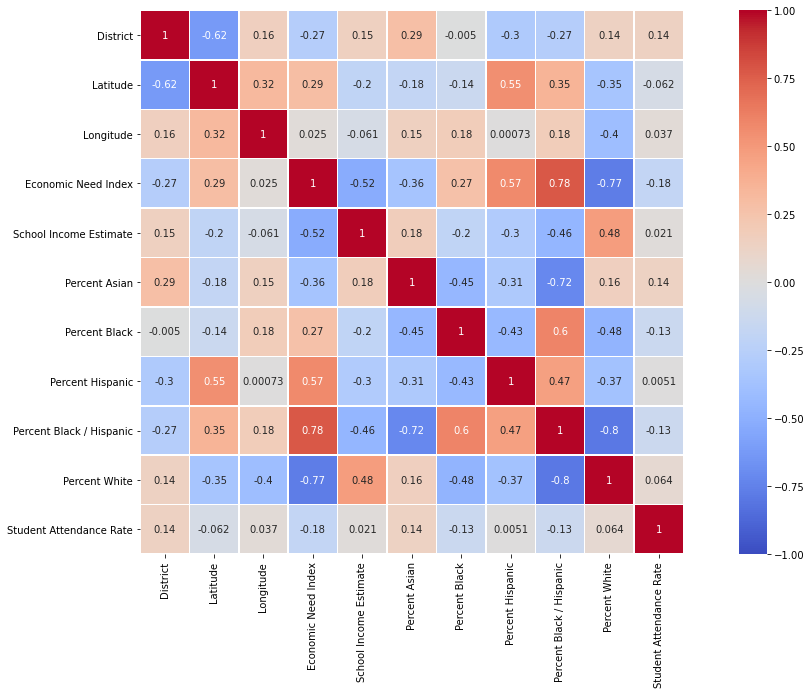

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(df2_2.corr(),
           vmin = -1,
           vmax = 1,
           cmap=sns.color_palette("coolwarm", as_cmap=True),
           square = True,
           linewidths = 0.5,
           annot=True);

In [58]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_black['Economic Need Index'], name='Black student'))
fig.add_trace(go.Histogram(x=df_white['Economic Need Index'], name='White student'))
fig.add_trace(go.Histogram(x=df_hisp['Economic Need Index'], name='Hispanic student'))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
fig.show()

In [66]:
fig = go.Figure()
fig = px.scatter(df2_2, x='Longitude', y='Latitude', size='School Income Estimate', color='Economic Need Index')
fig.show()